<a href="https://colab.research.google.com/github/sunaina5/Capestone-Project/blob/main/Linear_Regression_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/Salary_Data.csv"
data = pd.read_csv(path)
#load the data

In [4]:
print(data.head())
print(data.describe())
print(data.isna().sum())
print(data.columns)

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
YearsExperience    0
Salary             0
dtype: int64
Index(['YearsExperience', 'Salary'], dtype='object')


In [5]:
#split into x_training and y_training
data = data.values
x_training = data[:,0]
Y = data[:,1]
print(x_training)
print(Y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [6]:
#normalization of independent variable
u = x_training.mean()
std = x_training.std()
X = ((x_training-u)/std)
print(X)

[-1.51005294 -1.43837321 -1.36669348 -1.18749416 -1.11581443 -0.86493538
 -0.82909552 -0.75741579 -0.75741579 -0.57821647 -0.50653674 -0.47069688
 -0.47069688 -0.43485702 -0.29149756 -0.1481381  -0.07645838 -0.00477865
  0.21026054  0.2461004   0.53281931  0.6403389   0.92705781  1.03457741
  1.21377673  1.32129632  1.50049564  1.5363355   1.78721455  1.85889428]


<ipython-input-7-90c27011619a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


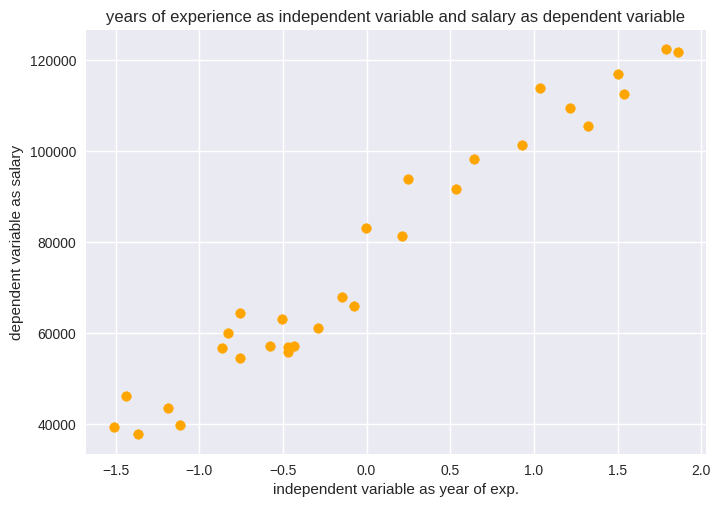

In [7]:
#visualization dependent - y-axis and independent - x-axis
plt.style.use('seaborn')
plt.scatter(X,Y,color = "orange")
plt.title("years of experience as independent variable and salary as dependent variable")
plt.xlabel('independent variable as year of exp.')
plt.ylabel('dependent variable as salary')
plt.show()

In [8]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2

    return (total_error/m)


def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):

    theta = np.zeros((2,))
    error_list = []
    theta_list = []


    for i in range(max_steps):

        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)


        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)

    return theta,error_list,theta_list

In [9]:
theta,error_list,theta_list = gradientDescent(X,Y)

In [10]:
theta

array([76000.981254  , 26366.48209429])

In [11]:
theta_list

[(7600.3, 2636.718244354243),
 (14440.570000000002, 5009.7646642730615),
 (20596.813000000002, 7145.5064422),
 (26137.4317, 9067.674042334242),
 (31123.988530000002, 10797.62488245506),
 (35611.889677, 12354.580638563797),
 (39651.0007093, 13755.840819061661),
 (43286.20063837, 15016.974981509738),
 (46557.880574533, 16151.995727713009),
 (49502.3925170797, 17173.51439929595),
 (52152.45326537173, 18092.881203720597),
 (54537.50793883456, 18920.31132770278),
 (56684.057144951104, 19664.998439286745),
 (58615.95143045599, 20335.216839712313),
 (60354.65628741039, 20938.413400095324),
 (61919.490658669354, 21481.290304440034),
 (63327.84159280242, 21969.879518350273),
 (64595.35743352218, 22409.60981086949),
 (65736.12169016997, 22805.367074136782),
 (66762.80952115297, 23161.54861107735),
 (67686.82856903768, 23482.11199432386),
 (68518.44571213391, 23770.619039245717),
 (69266.90114092051, 24030.27537967539),
 (69940.51102682846, 24263.966086062093),
 (70546.75992414562, 24474.28772181

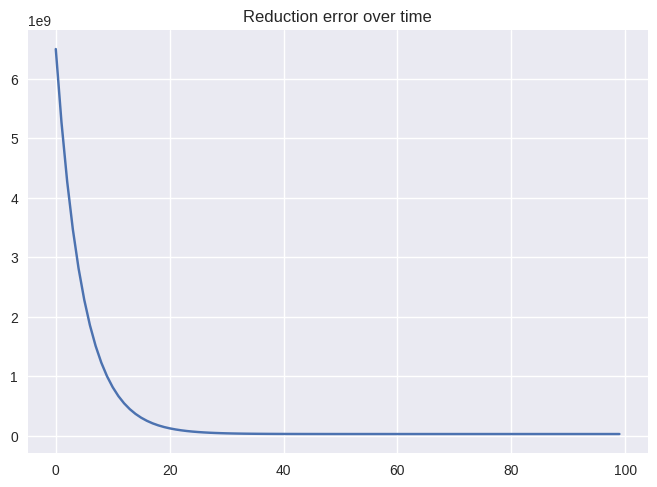

In [12]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [13]:
#PREDICTIONS AND BEST LINE
y_ = hypothesis(X,theta)
print(y_)

[ 36186.19757071  38076.13983416  39966.08209761  44690.93775622
  46580.88001967  53195.67794174  54140.64907346  56030.59133691
  56030.59133691  60755.44699553  62645.38925897  63590.3603907
  63590.3603907   64535.33152242  68315.21604931  72095.10057621
  73985.04283966  75874.9851031   81544.81189345  82489.78302517
  90049.55207896  92884.46547413 100444.23452792 103279.14792309
 108004.00358171 110838.91697688 115563.7726355  116508.74376722
 123123.54168929 125013.48395273]


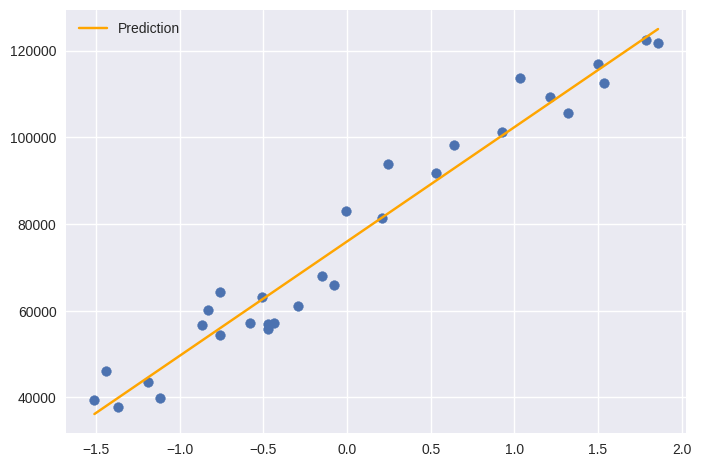

In [14]:
# Training + Predictions
plt.scatter(X,Y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [15]:
 #computing score - R2 (R-squaed) or coffecient of determination
 def r2_score(Y,y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [16]:
r2_score(Y,y_)

95.6956657858816

In [17]:
df2=pd.DataFrame({'actual':Y.flatten(),'prediction':y_.flatten()})
df2


,actual,prediction
0,39343.0,36186.197571
1,46205.0,38076.139834
2,37731.0,39966.082098
3,43525.0,44690.937756
4,39891.0,46580.880020
5,56642.0,53195.677942
6,60150.0,54140.649073
7,54445.0,56030.591337
8,64445.0,56030.591337
9,57189.0,60755.446996


<Axes: >

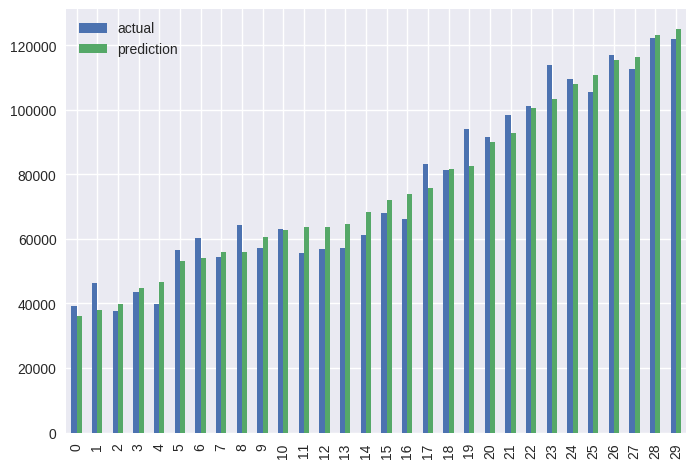

In [18]:
df2.plot(kind='bar')

In [19]:
theta

array([76000.981254  , 26366.48209429])

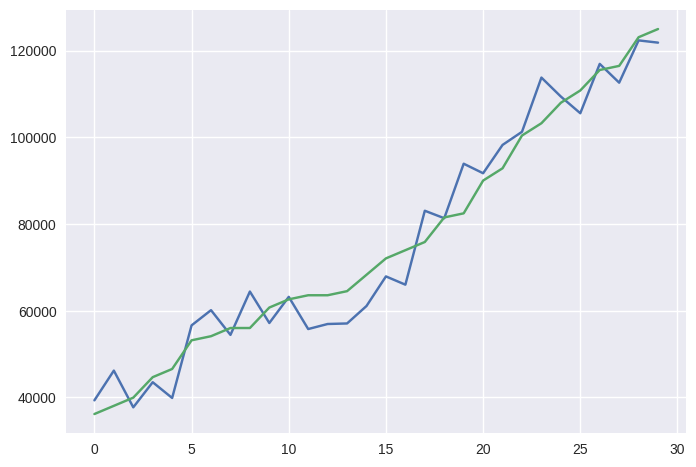

In [20]:
sns.lineplot(Y)
sns.lineplot(y_)
plt.legend()
plt.show()

In [21]:
#you can use the meshgrid and arranged values of t0 and t1 after your linear regression model
#has been trained and obtained the optimal parameter values (theta).
#The purpose of using the meshgrid and arranged values is to visualize the loss function and
#understand the relationship between the model parameters and the loss.

In [23]:
# Loss Actually
'''T0 = np.arange(-10000,10000,1)
T1 = np.arange(10000,70000,1)

T0,T1 = np.meshgrid(T0,T1)
t0_vals = np.arange(-10000, 10000, 0.1)
t1_vals = np.arange(10000, 70000, 0.1)

# Create a grid of values for t0 and t1 using meshgrid
T0, T1 = np.meshgrid(t0_vals, t1_vals)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j] #pred best fit line
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0] #error

print(J.shape)'''
t0_range = np.abs(theta[0]) * 0.1
t1_range = np.abs(theta[1]) * 0.1

# Define the values for t0 and t1 using the determined range
t0_min = theta[0] - t0_range
t0_max = theta[0] + t0_range
t1_min = theta[1] - t1_range
t1_max = theta[1] + t1_range

# Create a grid of values for t0 and t1 using meshgrid
t0_vals = np.linspace(t0_min, t0_max, 100)
t1_vals = np.linspace(t1_min, t1_max, 100)
T0, T1 = np.meshgrid(t0_vals, t1_vals)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j] #pred best fit line
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0] #error

print(J.shape)

(100, 100)


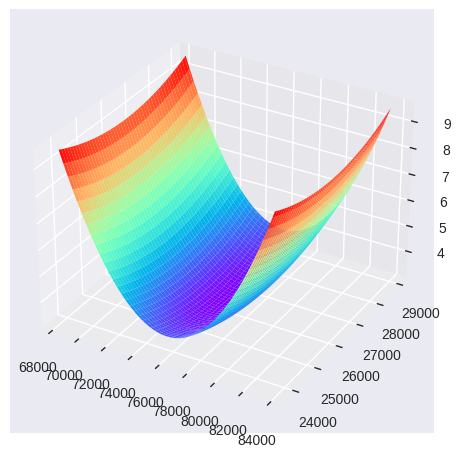

In [24]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

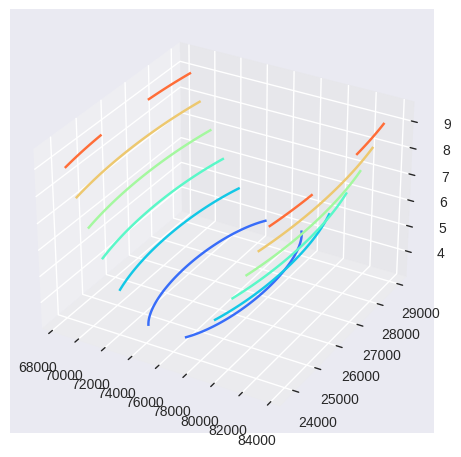

In [25]:
# Contour Plot
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

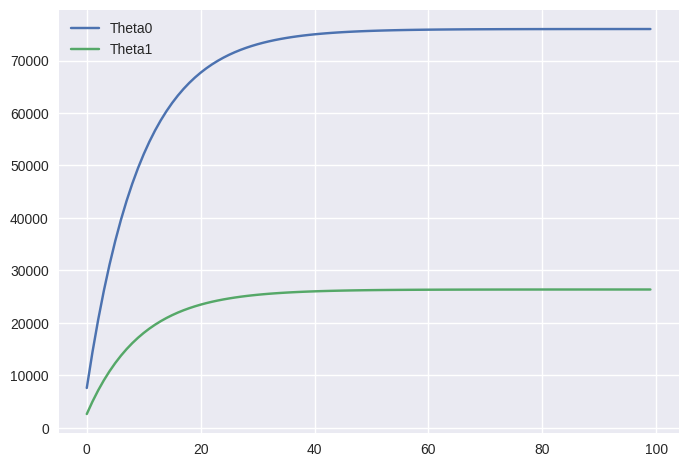

In [41]:
#plot the changes in the value of theta
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()